In [2]:
%pip install pyspark 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyspark as ps
from pyspark.sql import SparkSession

In [4]:
import findspark
findspark.init()

In [5]:
spark = SparkSession.builder.master("local[*]").appName("spark").getOrCreate()


In [6]:
sc = spark.sparkContext

In [7]:
dataset_parent_dir = './'

In [8]:
league_min_df_path = dataset_parent_dir + 'matches-1k.json'
league_df = spark.read.json(league_min_df_path)

In [9]:
league_df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- gameCreation: long (nullable = true)
 |-- gameDuration: long (nullable = true)
 |-- gameId: long (nullable = true)
 |-- gameMode: string (nullable = true)
 |-- gameType: string (nullable = true)
 |-- gameVersion: string (nullable = true)
 |-- mapId: long (nullable = true)
 |-- participantIdentities: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- participantId: long (nullable = true)
 |    |    |-- player: struct (nullable = true)
 |    |    |    |-- accountId: string (nullable = true)
 |    |    |    |-- currentAccountId: string (nullable = true)
 |    |    |    |-- currentPlatformId: string (nullable = true)
 |    |    |    |-- matchHistoryUri: string (nullable = true)
 |    |    |    |-- platformId: string (nullable = true)
 |    |    |    |-- profileIcon: long (nullable = true)
 |    |    |    |-- summonerId: string (nullable = true)
 |    |    |    |-- summo

In [10]:
league_rdd = league_df.rdd

In [11]:
def get_league_name(row):
    item_lists = []
    for participant in row['participants']:
        stats = participant['stats']
        item_list = []
        for i in range(7):
            item = stats['item' + str(i)]
            item_name = item['name'] if item else None
            if item_name: item_list.append(item_name)
        item_lists.append((item_list, stats['win']))
    return item_lists

In [12]:
new_rdd = league_rdd.flatMap(get_league_name)

In [13]:
new_rdd.take(600)

[(['Shard of True Ice',
   "Athene's Unholy Grail",
   'Ardent Censer',
   "Mercury's Treads",
   'Cloth Armor',
   'Sapphire Crystal',
   'Oracle Lens'],
  False),
 (['Bilgewater Cutlass',
   'Iceborn Gauntlet',
   'Muramana',
   'Ninja Tabi',
   "Doran's Blade",
   'Dagger',
   'Farsight Alteration'],
  False),
 (['Enchantment: Cinderhulk',
   'Spirit Visage',
   "Giant's Belt",
   "Mercury's Treads",
   'Control Ward',
   'Oracle Lens'],
  False),
 (["Doran's Shield",
   'Hextech Protobelt-01',
   "Liandry's Torment",
   "Seeker's Armguard",
   "Mercury's Treads",
   'Warding Totem (Trinket)'],
  False),
 (['Corrupting Potion',
   "Zhonya's Hourglass",
   'Morellonomicon',
   'Rod of Ages',
   'Ninja Tabi',
   'Farsight Alteration'],
  False),
 (["Luden's Echo",
   'Morellonomicon',
   'Blasting Wand',
   "Seeker's Armguard",
   "Sorcerer's Shoes",
   'Broken Stopwatch',
   'Farsight Alteration'],
  True),
 (['Quicksilver Sash',
   'Blade of the Ruined King',
   "Mercury's Treads",


In [14]:
from plotnine import ggplot, aes, geom_point
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd


from plotnine import ggplot, aes, geom_bar, labs
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats as stats

import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def extract_match_data(match):
    data = []
    secdata = []
    for participant in match['participants']:
        stats = participant['stats']
        damage_dealt = stats['totalDamageDealtToChampions']
        damage_taken = stats['totalDamageTaken']
        win = stats['win']
        data.append((damage_dealt, damage_taken, win))
    return data

def extract_match_data2(match):
    secdata = []
    for participant in match['participants']:
        stats = participant['stats']
        deaths = stats['deaths']
        kills = stats['kills']
        assists = stats['assists']
        secdata.append((deaths, kills, assists))
    return secdata

def extract_match_data3(match):
    thirddata = []
    for participant in match['participants']:
        stats = participant['stats']
        gold = stats['goldEarned']
        goldspent = stats['goldSpent']
        minions = stats['totalMinionsKilled']
        thirddata.append((gold, goldspent,minions))
    return thirddata

def extract_match_data4(match):
    fourthdata = []
    for participant in match['participants']:
        stats = participant['stats']
        totalDamageTaken = stats['totalDamageTaken']
        totalHeal = stats['totalHeal']
        totalDamageDealtToChampions= stats['totalDamageDealtToChampions']
        fourthdata.append((totalDamageTaken, totalHeal,totalDamageDealtToChampions))
    return fourthdata

def extract_match_data5(match):
    fifthdata = []
    for participant in match['participants']:
        championId = participant['championId']
        spell1Id = participant['spell1Id']
        spell2Id = participant['spell2Id']
        fifthdata.append((championId, spell1Id, spell2Id))
    return fifthdata

data_rdd = league_rdd.flatMap(extract_match_data)
data_rdd2 = league_rdd.flatMap(extract_match_data2)
data_rdd3 = league_rdd.flatMap(extract_match_data3)
data_rdd4 = league_rdd.flatMap(extract_match_data4)
data_rdd5 = league_rdd.flatMap(extract_match_data5)

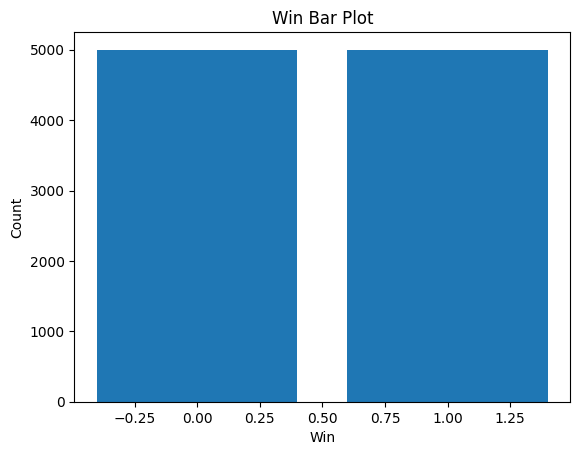

Win equals loss in this dataset as it is a sample of 1000 matches.


In [15]:
win_values = data_rdd.map(lambda x: x[2]).collect()

# Count the occurrences of each value
win_counts = {}
for win in win_values:
    if win in win_counts:
        win_counts[win] += 1
    else:
        win_counts[win] = 1

# Prepare the data for the bar plot
x = list(win_counts.keys())
y = list(win_counts.values())

# Plot the bar plot using matplotlib
plt.bar(x, y)
plt.title('Win Bar Plot')
plt.xlabel('Win')
plt.ylabel('Count')
plt.show()

print("Win equals loss in this dataset as it is a sample of 1000 matches.")

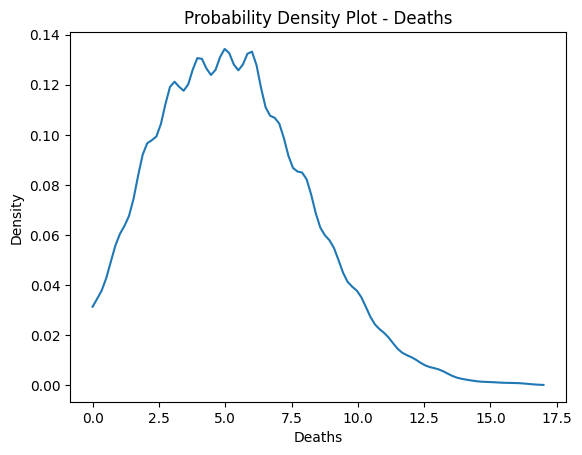

In [16]:
deaths_values = data_rdd2.map(lambda x: x[0]).collect()

# Compute the kernel density estimate (KDE) for the "deaths" values
kde = gaussian_kde(deaths_values)
x = np.linspace(min(deaths_values), max(deaths_values), 100)
y = kde(x)

# Plot the probability density using matplotlib
plt.plot(x, y)
plt.title('Probability Density Plot - Deaths')
plt.xlabel('Deaths')
plt.ylabel('Density')
plt.show()


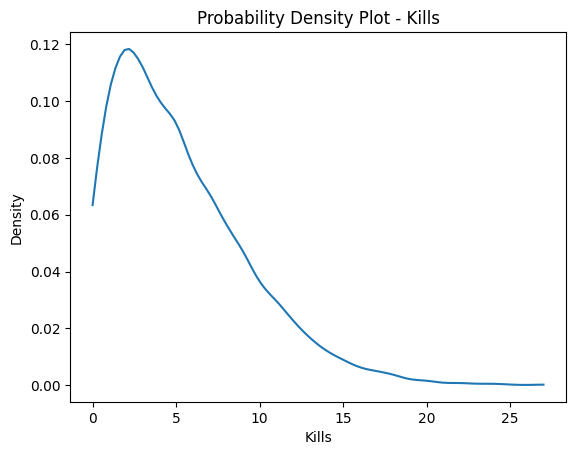

In [17]:
kills_values = data_rdd2.map(lambda x: x[1]).collect()

# Compute the kernel density estimate (KDE) for the "kills" values
kde = gaussian_kde(kills_values)
x = np.linspace(min(kills_values), max(kills_values), 100)
y = kde(x)

# Plot the probability density using matplotlib
plt.plot(x, y)
plt.title('Probability Density Plot - Kills')
plt.xlabel('Kills')
plt.ylabel('Density')
plt.show()



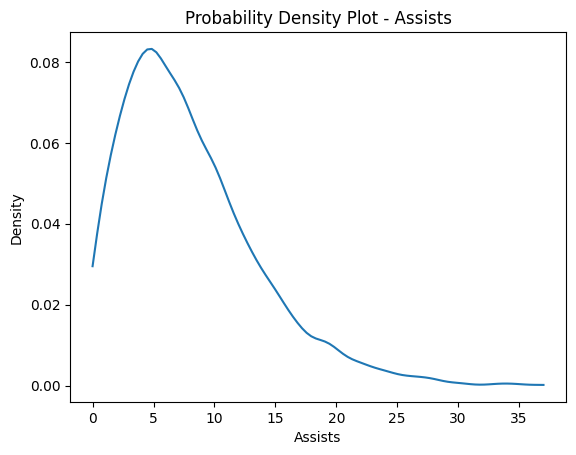

In [18]:
assists_values = data_rdd2.map(lambda x: x[2]).collect()

# Compute the kernel density estimate (KDE) for the "kills" values
kde = gaussian_kde(assists_values)
x = np.linspace(min(assists_values), max(assists_values), 100)
y = kde(x)

# Plot the probability density using matplotlib
plt.plot(x, y)
plt.title('Probability Density Plot - Assists')
plt.xlabel('Assists')
plt.ylabel('Density')
plt.show()

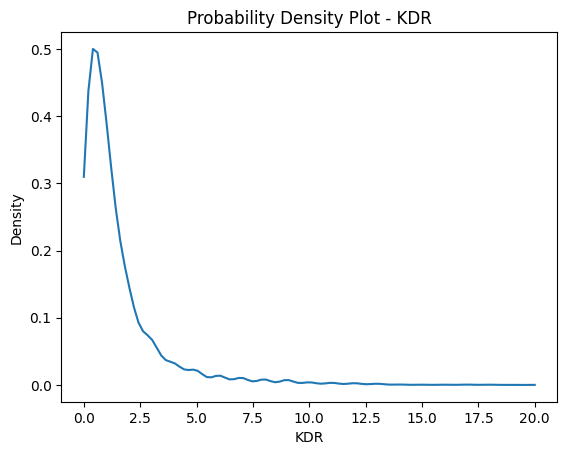

In [19]:
kda_values = []
for i in range(len(kills_values)):
    if deaths_values[i] == 0:
        kda_values.append((kills_values[i] ) / 1)
    else:
        kda_values.append((kills_values[i] ) / deaths_values[i])

kde = gaussian_kde(kda_values)
x = np.linspace(min(kda_values), max(kda_values), 100)
y = kde(x)

# Plot the probability density using matplotlib
plt.plot(x, y)
plt.title('Probability Density Plot - KDR')
plt.xlabel('KDR')
plt.ylabel('Density')
plt.show()

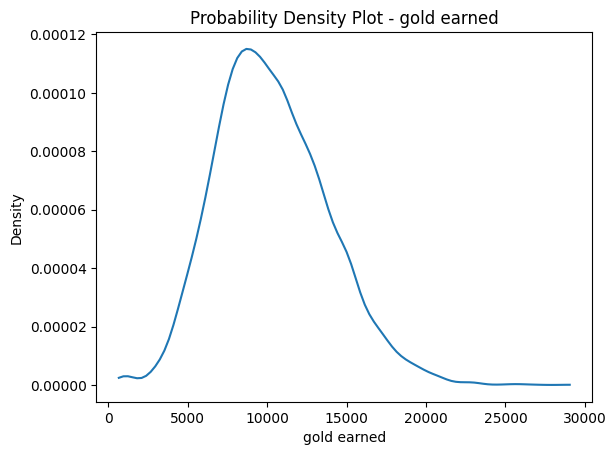

In [20]:
gold_values = data_rdd3.map(lambda x: x[0]).collect()

# Compute the kernel density estimate (KDE) for the "gold earned" values
kde = gaussian_kde(gold_values)
x = np.linspace(min(gold_values), max(gold_values), 100)
y = kde(x)

# Plot the probability density using matplotlib
plt.plot(x, y)
plt.title('Probability Density Plot - gold earned')
plt.xlabel('gold earned')
plt.ylabel('Density')
plt.show()

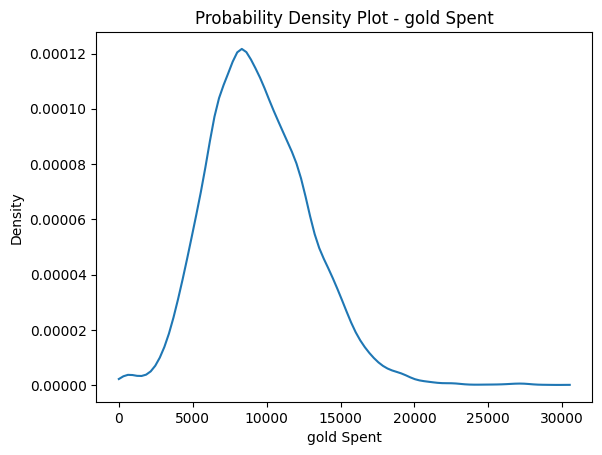

In [21]:
gold_values = data_rdd3.map(lambda x: x[1]).collect()

# Compute the kernel density estimate (KDE) for the "gold Spent" values
kde = gaussian_kde(gold_values)
x = np.linspace(min(gold_values), max(gold_values), 100)
y = kde(x)

# Plot the probability density using matplotlib
plt.plot(x, y)
plt.title('Probability Density Plot - gold Spent')
plt.xlabel('gold Spent')
plt.ylabel('Density')
plt.show()

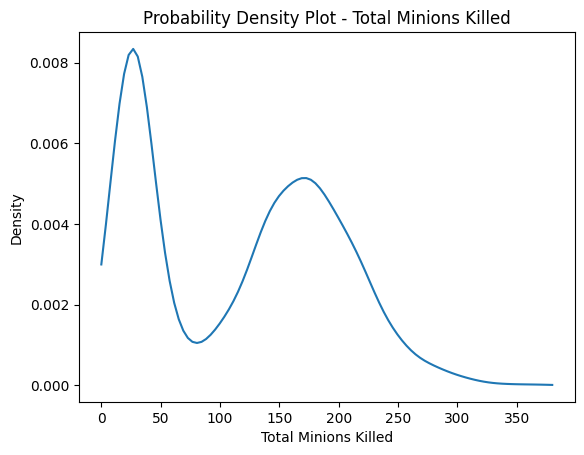

In [22]:

minions_values = data_rdd3.map(lambda x: x[2]).collect()
# Compute the kernel density estimate (KDE) for the "total Minions Killed" values
kde = gaussian_kde(minions_values)
x = np.linspace(min(minions_values), max(minions_values), 100)
y = kde(x)

# Plot the probability density using matplotlib
plt.plot(x, y)
plt.title('Probability Density Plot - Total Minions Killed')
plt.xlabel('Total Minions Killed')
plt.ylabel('Density')
plt.show()

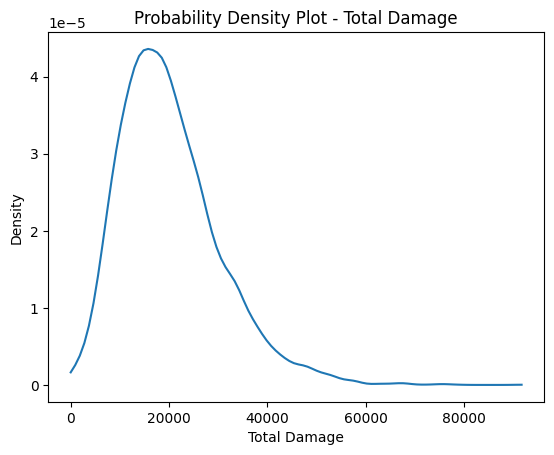

In [23]:
Total_Damage_values = data_rdd4.map(lambda x: x[0]).collect()
# Compute the kernel density estimate (KDE) for the "total Minions Killed" values
kde = gaussian_kde(Total_Damage_values)
x = np.linspace(min(Total_Damage_values), max(Total_Damage_values), 100)
y = kde(x)

# Plot the probability density using matplotlib
plt.plot(x, y)
plt.title('Probability Density Plot - Total Damage')
plt.xlabel('Total Damage')
plt.ylabel('Density')
plt.show()

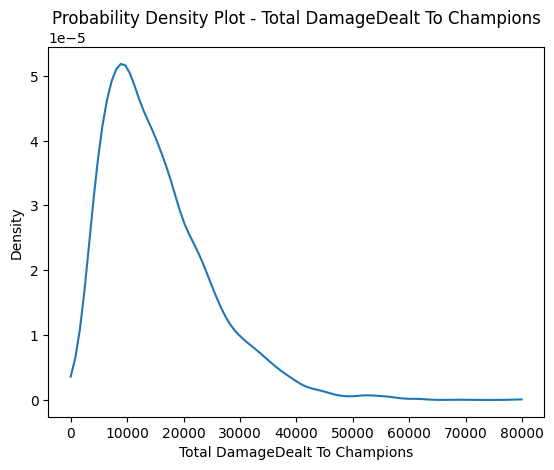

In [24]:
#totalDamageDealtToChampions
totalDamageDealtToChampions_values = data_rdd4.map(lambda x: x[2]).collect()
# Compute the kernel density estimate (KDE) for the "total Minions Killed" values
kde = gaussian_kde(totalDamageDealtToChampions_values)
x = np.linspace(min(totalDamageDealtToChampions_values), max(totalDamageDealtToChampions_values), 100)
y = kde(x)

# Plot the probability density using matplotlib
plt.plot(x, y)
plt.title('Probability Density Plot - Total DamageDealt To Champions')
plt.xlabel('Total DamageDealt To Champions')
plt.ylabel('Density')
plt.show()

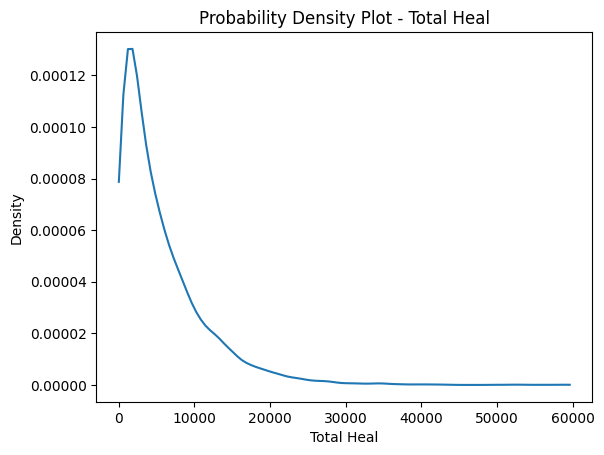

In [25]:
Total_Heal_values = data_rdd4.map(lambda x: x[1]).collect()
# Compute the kernel density estimate (KDE) for the "total Minions Killed" values
kde = gaussian_kde(Total_Heal_values)
x = np.linspace(min(Total_Heal_values), max(Total_Heal_values), 100)
y = kde(x)

# Plot the probability density using matplotlib
plt.plot(x, y)
plt.title('Probability Density Plot - Total Heal')
plt.xlabel('Total Heal')
plt.ylabel('Density')
plt.show()

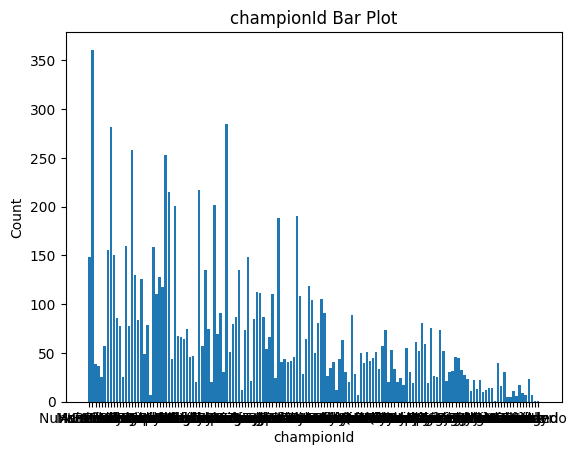

In [26]:
championId_values = data_rdd5.map(lambda x: x[0]).collect()

# Count the occurrences of each value
championId_counts = {}
for championId in championId_values:
    if championId in championId_counts:
        championId_counts[championId] += 1
    else:
        championId_counts[championId] = 1

# Prepare the data for the bar plot
x = list(championId_counts.keys())
y = list(championId_counts.values())

# Plot the bar plot using matplotlib
plt.bar(x, y)
plt.title('championId Bar Plot')
plt.xlabel('championId')
plt.ylabel('Count')
plt.show()

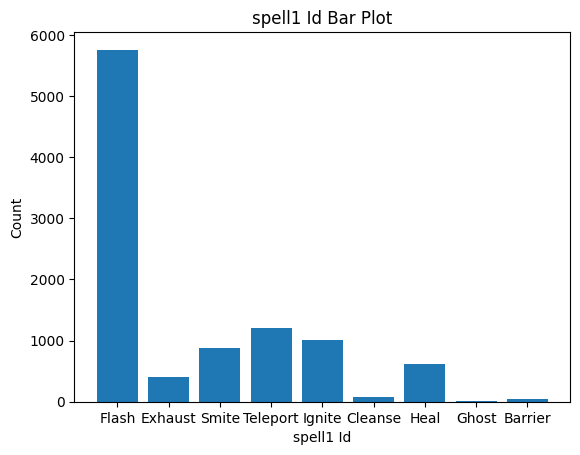

In [27]:
spell1Id_values = data_rdd5.map(lambda x: x[1]).collect()

# Count the occurrences of each value
spell1Id_counts = {}
for spell1Id in spell1Id_values:
    if spell1Id in spell1Id_counts:
        spell1Id_counts[spell1Id] += 1
    else:
        spell1Id_counts[spell1Id] = 1

# Prepare the data for the bar plot
x = list(spell1Id_counts.keys())
y = list(spell1Id_counts.values())

# Plot the bar plot using matplotlib
plt.bar(x, y)
plt.title('spell1 Id Bar Plot')
plt.xlabel('spell1 Id')
plt.ylabel('Count')
plt.show()

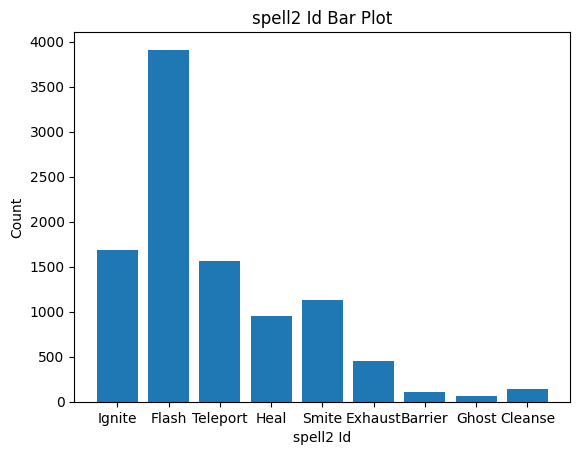

In [28]:
spell2Id_values = data_rdd5.map(lambda x: x[2]).collect()

# Count the occurrences of each value
spell2Id_counts = {}
for spell2Id in spell2Id_values:
    if spell2Id in spell2Id_counts:
        spell2Id_counts[spell2Id] += 1
    else:
        spell2Id_counts[spell2Id] = 1

# Prepare the data for the bar plot
x = list(spell2Id_counts.keys())
y = list(spell2Id_counts.values())

# Plot the bar plot using matplotlib
plt.bar(x, y)
plt.title('spell2 Id Bar Plot')
plt.xlabel('spell2 Id')
plt.ylabel('Count')
plt.show()